In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
import yfinance as yf
crypt = 'BTC-USD'
start_date = "2019-01-01"
end_date = "2024-01-01"
df = yf.download(crypt, start=start_date, end=end_date)
print(df)


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2019-01-01   3746.713379   3850.913818   3707.231201   3843.520020   
2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
2019-01-05   3851.973877   3904.903076   3836.900146   3845.194580   
...                  ...           ...           ...           ...   
2023-12-27  42518.468750  43683.160156  42167.582031  43442.855469   
2023-12-28  43468.199219  43804.781250  42318.550781  42627.855469   
2023-12-29  42614.644531  43124.324219  41424.062500  42099.402344   
2023-12-30  42091.753906  42584.125000  41556.226562  42156.902344   
2023-12-31  42152.097656  42860.937500  41998.253906  42265.187500   

               Adj Close       Volume  
Date                                   
2019-01-0

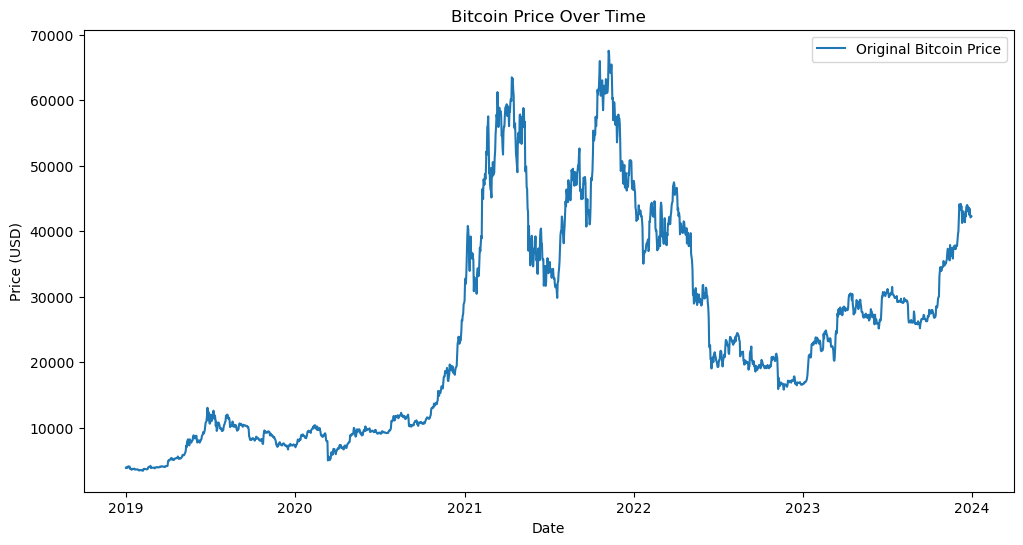

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'],label='Original Bitcoin Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [3]:
dataset = df['Close']
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(1826, 1)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data))
training_data = int(len(data)*0.8)
testing_data = int(len(data)-training_data)
print('Training data:',training_data,'Testing data:',testing_data)

Training data: 1460 Testing data: 366


In [5]:
train_data = scaled_data[0:training_data,:]
train_data.shape

(1460, 1)

In [6]:
X_train = []
Y_train = []
cols = 1
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,:cols])
    Y_train.append(train_data[i,:cols])
    if i<=60:
        print('X_train:',X_train)
        print('Y_train:',Y_train)
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train: [array([[0.00692016],
       [0.00847686],
       [0.00681452],
       [0.00714142],
       [0.00694626],
       [0.01055304],
       [0.00975226],
       [0.00983952],
       [0.00990885],
       [0.00435506],
       [0.00448661],
       [0.00408041],
       [0.00239189],
       [0.00477783],
       [0.00360313],
       [0.00398232],
       [0.00434944],
       [0.00402647],
       [0.00512872],
       [0.00314088],
       [0.00275157],
       [0.00319641],
       [0.00289324],
       [0.00313857],
       [0.00312143],
       [0.00316343],
       [0.0028752 ],
       [0.00110615],
       [0.0007581 ],
       [0.00135131],
       [0.00090889],
       [0.0013788 ],
       [0.00189487],
       [0.00100583],
       [0.0009301 ],
       [0.00104236],
       [0.00022279],
       [0.        ],
       [0.0041658 ],
       [0.00423474],
       [0.0045306 ],
       [0.00387984],
       [0.00395929],
       [0.00362488],
       [0.00338816],
       [0.0034494 ],
       [0.0035893 ],
   

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],cols))
X_train.shape,Y_train.shape

((1400, 60, 1), (1400, 1))

In [8]:
model = Sequential([    
    LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1],cols)),
    LSTM(units = 64,return_sequences = False),
    Dense(units = 32),
    Dense(units = 16),
    Dense(units = cols)
])
model.compile(optimizer='adam',loss='mse')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.fit(X_train,Y_train,epochs=50,batch_size = 32)

Epoch 1/50

44/44 [==============================] - 11s 61ms/step - loss: 0.0097
Epoch 2/50
44/44 [==============================] - 3s 78ms/step - loss: 0.0019
Epoch 3/50
44/44 [==============================] - 4s 87ms/step - loss: 0.0014
Epoch 4/50
44/44 [==============================] - 4s 84ms/step - loss: 0.0012
Epoch 5/50
44/44 [==============================] - 4s 85ms/step - loss: 0.0012
Epoch 6/50
44/44 [==============================] - 4s 94ms/step - loss: 9.8553e-04
Epoch 7/50
44/44 [==============================] - 4s 79ms/step - loss: 8.9404e-04
Epoch 8/50
44/44 [==============================] - 4s 93ms/step - loss: 9.3123e-04
Epoch 9/50
44/44 [==============================] - 4s 90ms/step - loss: 8.3872e-04
Epoch 10/50
44/44 [==============================] - 4s 80ms/step - loss: 8.2744e-04
Epoch 11/50
44/44 [==============================] - 4s 83ms/step - loss: 8.3185e-04
Epoch 12/50
44/44 [==============================] - 4s 84ms/step - loss: 0.0010
Epoch 13/50

In [10]:
test_data = scaled_data[training_data-60:,:]
X_test = []
Y_test = []
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0:cols])
    Y_test.append(test_data[i, 0:cols])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],cols))
X_test.shape,Y_test.shape

((366, 60, 1), (366, 1))

In [11]:
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)
prediction.shape

12/12 [==============================] - 2s 21ms/step


(366, 1)

In [12]:
Y_test = scaler.inverse_transform(Y_test)
rsme = np.sqrt(np.mean(Y_test-prediction)**2).round(2)
rsme

31.38

In [29]:
output = pd.DataFrame(data={'predictions':prediction.flatten(),'Actuals':Y_test.flatten()})
output

,predictions,Actuals
0,16575.865234,16547.496094
1,16538.447266,16625.080078
2,16561.224609,16688.470703
3,16613.064453,16679.857422
4,16636.460938,16863.238281
...,...,...
361,42857.882812,43442.855469
362,43511.535156,42627.855469
363,42936.015625,42099.402344
364,42349.984375,42156.902344


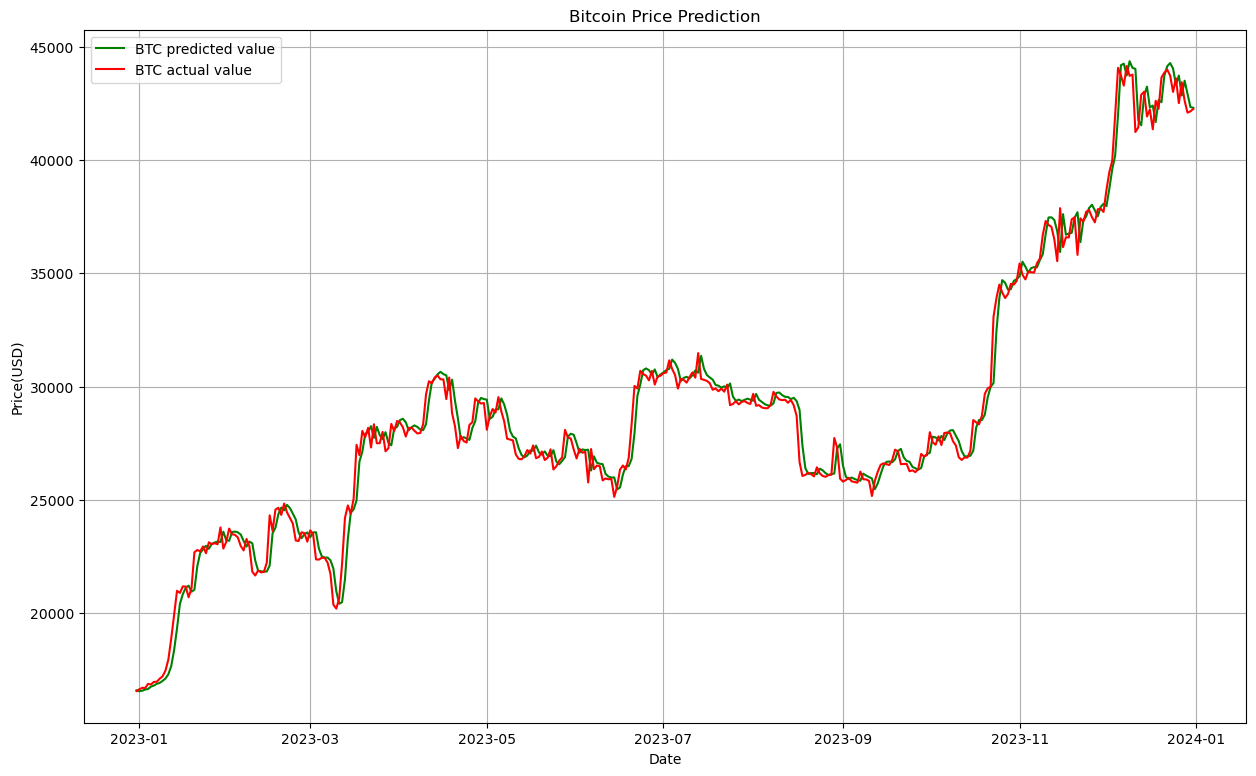

In [30]:
to_row = int(len(df) * 0.8)
plt.figure(figsize = (15,9))
plt.grid(True)
data = df[to_row:].index
plt.plot(data,prediction,color='Green',linestyle='solid',label="BTC predicted value")
plt.plot(data,Y_test,color='red',label="BTC actual value")
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

In [31]:
mae = np.mean(np.abs(prediction - Y_test))
mse = np.mean(np.square(prediction - Y_test))
rsme1 = np.sqrt(mse)
mape = np.mean(mae / Y_test) * 100
print("Mean Absolute Error: "+str(mae))   
print("Mean Squared Error: "+str(mse)) 
print("Root Mean Squared Error: "+str(rsme1)) 
print("Mean Absolute Percentage Error: "+str(mape),"%") 

Mean Absolute Error: 469.7441192793716
Mean Squared Error: 473292.94062054745
Root Mean Squared Error: 687.9628918921045
Mean Absolute Percentage Error: 1.6962825825408443 %
